In [153]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from gensim.models import keyedvectors

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
data = pd.read_csv('topics.csv', encoding="ISO-8859-1")
data.head(5)

,title,content,content_word_count,published_date,created_at,updated_at,language,article_links,total_share_count,keywords_status,...,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,geo_locations,topic
0,Mitsubishi Motors Co. (OTCMKTS:MMTOF) Short In...,29c9689e5ed81852967ff964f16be109a37dd9ecb1f5c9...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,['https://www.marketbeat.com/stocks/OTCMKTS/MM...,0.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,business
1,Juventus off the hook! Bianconeri set to have ...,b9e3313535ffdbc2fe198572f17ce61330980dfab64324...,225.0,2023-04-19 6:23,2023-04-19 6:44,2023-04-19 7:49,en,['https://www.gazzetta.it/Calcio/Serie-A/Juven...,0.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,sports
2,Dodgers ponder shortstop for Betts after pater...,2e7bdbd8a033973c2309948b0b1b9de02bf7491e7b464c...,389.0,2023-04-18 0:00,2023-04-19 6:39,2023-04-19 6:39,en,NaN,0.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,sports
3,"Meta lays off tech teams, battering employee m...",d4e3c5c938a4c636d40cac488f32cda1cdc02c6372a5f9...,379.0,2023-04-19 5:27,2023-04-19 6:04,2023-04-19 7:00,en,"['/', '/news/most-popular-news', '/news/econom...",1.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,technology
4,FDA clears extra COVID booster for some high-r...,cfd7f633608c252af099ccb7f4a5a02eed9e7c68efe6fb...,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,"['https://abcnews.go.com/alerts/Vaccinations',...",0.0,True,...,False,False,False,False,False,False,['washington'],['united kingdom'],"[{'country': 'GB', 'coordinates': [-1.51667, 5...",health


In [156]:
# shape of the data
data.shape

(10001, 30)

In [157]:
data.describe()

,content_word_count,total_share_count,sentiment,title_sentiment
count,10000.000000,9999.000000,9984.000000,5107.000000
mean,515.306900,277.081008,16.694111,0.281183
std,804.974659,4983.928745,42.877577,2.913501
min,5.000000,0.000000,-309.000000,-14.000000
25%,197.000000,0.000000,-2.000000,-2.000000
50%,378.000000,0.000000,11.000000,1.000000
75%,661.000000,2.000000,32.000000,2.000000
max,57135.000000,313687.000000,629.000000,17.000000


In [158]:
data.dtypes

title                  object
content                object
content_word_count    float64
published_date         object
created_at             object
updated_at             object
language               object
article_links          object
total_share_count     float64
keywords_status        object
keywords               object
entities               object
sentiment             float64
title_sentiment       float64
keywords_ex            object
infographic            object
case_study             object
review                 object
video                  object
podcast                object
webinar                object
interview              object
quote                  object
meme                   object
give_away              object
quiz                   object
cities_and_states      object
countries              object
geo_locations          object
topic                  object
dtype: object

In [159]:
data.isnull().sum()

title                    1
content                  1
content_word_count       1
published_date           1
created_at               1
updated_at               1
language                 1
article_links         2897
total_share_count        2
keywords_status         22
keywords                22
entities                22
sentiment               17
title_sentiment       4894
keywords_ex             17
infographic              3
case_study               3
review                   3
video                    3
podcast                  3
webinar                  3
interview                3
quote                    3
meme                     3
give_away                3
quiz                     3
cities_and_states     6662
countries             6662
geo_locations         6662
topic                    0
dtype: int64

There aer almost objects in dataset which need to label encoding in ipcoming steps.

In [160]:
# remove unwanted columns
drop_clm = ['content', 'article_links', 'geo_locations', 'title_sentiment']
data = data.drop(columns= drop_clm)
data.shape

(10001, 26)

In [161]:
data = data.head(6000)

In [162]:
data.shape

(6000, 26)

<AxesSubplot:title={'center':'Unique values'}>

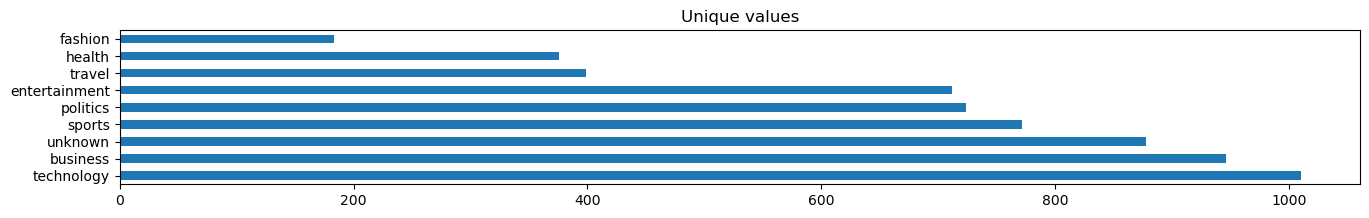

In [163]:
# Unique value in sentiment column with their frequency
sentiment_c = data['topic'].value_counts()
sentiment_c.plot(kind='barh', figsize=(16, 2), title='Unique values')

In [164]:
# Check duplicate values into data
print("Total duplicate values in dataset: ", data.duplicated(keep='last').sum())

Total duplicate values in dataset:  0


In [165]:
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,Mitsubishi Motors Co. (OTCMKTS:MMTOF) Short In...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"['recipient', 'growth', 'interest', 'shares', ...","['Mitsubishi Motors Co', 'Citigroup', 'Mitsubi...",...,False,False,False,False,False,False,False,NaN,NaN,business


Data preprocessing

In [166]:
# create again string to apply tokenizer
def array_to_string(txt):
    try:
        str = ""
        for i in txt:
            str = str + i + ""
        return str
    except Exception as err:
        return err
    
data['keywords'] = data['keywords'].apply(lambda i: array_to_string(i))
data['entities'] = data['entities'].apply(lambda i: array_to_string(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: array_to_string(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: array_to_string(i))
data['countries'] = data['countries'].apply(lambda i: array_to_string(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,Mitsubishi Motors Co. (OTCMKTS:MMTOF) Short In...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"['recipient', 'growth', 'interest', 'shares', ...","['Mitsubishi Motors Co', 'Citigroup', 'Mitsubi...",...,False,False,False,False,False,False,False,'float' object is not iterable,'float' object is not iterable,business


In [167]:
# Remove punctuation from data for example '!@#$%^&*()_+'
import string
print("String punctuation: ", string.punctuation)

String punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [168]:
data['title'][4]

'FDA clears extra COVID booster for some high-risk Americans'

In [169]:
# Remove punctuation in title
def punctuation_removal(s):
    line = ''
    try:
        for i in s:
            if i not in string.punctuation:
                line += i
        return line 
    except Exception as err:
        return f"Error, {err}"

data['title'] = data['title'].apply(lambda i: punctuation_removal(i))
data['keywords'] = data['keywords'].apply(lambda i: punctuation_removal(i))
data['entities'] = data['entities'].apply(lambda i: punctuation_removal(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: punctuation_removal(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: punctuation_removal(i))
data['countries'] = data['countries'].apply(lambda i: punctuation_removal(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,Mitsubishi Motors Co OTCMKTSMMTOF Short Intere...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,recipient growth interest shares trading volum...,Mitsubishi Motors Co Citigroup Mitsubishi Moto...,...,False,False,False,False,False,False,False,"Error, 'TypeError' object is not iterable","Error, 'TypeError' object is not iterable",business


In [170]:
# Convert string in lower form
def data_lower(txt):
    try:
        x = txt.lower()
        return x
    except Exception as err:
        return f"Error: {err}"

data['title'] = data['title'].apply(lambda i: data_lower(i))
data['keywords'] = data['keywords'].apply(lambda i: data_lower(i))
data['entities'] = data['entities'].apply(lambda i: data_lower(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: data_lower(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: data_lower(i))
data['countries'] = data['countries'].apply(lambda i: data_lower(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,mitsubishi motors co otcmktsmmtof short intere...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,recipient growth interest shares trading volum...,mitsubishi motors co citigroup mitsubishi moto...,...,False,False,False,False,False,False,False,"error, 'typeerror' object is not iterable","error, 'typeerror' object is not iterable",business


In [171]:
# Tokenization of data
from nltk.tokenize import word_tokenize
def data_tokenization(txt):
    try:
        x = re.sub(r"\n", " ", txt)
        x = re.sub(r"\s+", " ", x)
        x = x.strip()
        outp = word_tokenize(x)
        return outp
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: data_tokenization(i))
data['keywords'] = data['keywords'].apply(lambda i: data_tokenization(i))
data['entities'] = data['entities'].apply(lambda i: data_tokenization(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: data_tokenization(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: data_tokenization(i))
data['countries'] = data['countries'].apply(lambda i: data_tokenization(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,"[mitsubishi, motors, co, otcmktsmmtof, short, ...",221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"[recipient, growth, interest, shares, trading,...","[mitsubishi, motors, co, citigroup, mitsubishi...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, is, not, ite...","[error, ,, 'typeerror, ', object, is, not, ite...",business


In [172]:
# remove stop word
from nltk.corpus import stopwords

sw = nltk.corpus.stopwords.words('english')
def stopword_removal(txt):
    x = []
    try:
        for i in txt:
            if i not in sw:
                x.append(i)
        return x
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: stopword_removal(i))
data['keywords'] = data['keywords'].apply(lambda i: stopword_removal(i))
data['entities'] = data['entities'].apply(lambda i: stopword_removal(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: stopword_removal(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: stopword_removal(i))
data['countries'] = data['countries'].apply(lambda i: stopword_removal(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,"[mitsubishi, motors, co, otcmktsmmtof, short, ...",221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"[recipient, growth, interest, shares, trading,...","[mitsubishi, motors, co, citigroup, mitsubishi...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iterable]","[error, ,, 'typeerror, ', object, iterable]",business


In [173]:
# Doing stemming for data
from nltk.stem.porter import PorterStemmer
stm = PorterStemmer()

def stemming(txt):
    try:
        x = []
        for i in txt:
            y = stm.stem(i)
            x.append(y)
        return x
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: stemming(i))
data['keywords'] = data['keywords'].apply(lambda i: stemming(i))
data['entities'] = data['entities'].apply(lambda i: stemming(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: stemming(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: stemming(i))
data['countries'] = data['countries'].apply(lambda i: stemming(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,"[mitsubishi, motor, co, otcmktsmmtof, short, i...",221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"[recipi, growth, interest, share, trade, volum...","[mitsubishi, motor, co, citigroup, mitsubishi,...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",business


In [174]:
# Lemmatization for data
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

def word_lemmiatization(txt):
    try:
        x = []
        for i in txt:
            y = wl.lemmatize(i, pos="v")
            x.append(y)
        return x
    
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: word_lemmiatization(i))
data['keywords'] = data['keywords'].apply(lambda i: word_lemmiatization(i))
data['entities'] = data['entities'].apply(lambda i: word_lemmiatization(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: word_lemmiatization(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: word_lemmiatization(i))
data['countries'] = data['countries'].apply(lambda i: word_lemmiatization(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,"[mitsubishi, motor, co, otcmktsmmtof, short, i...",221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"[recipi, growth, interest, share, trade, volum...","[mitsubishi, motor, co, citigroup, mitsubishi,...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",business


In [175]:
from sklearn import preprocessing 
label_prepross = preprocessing.LabelEncoder()

data['topic'] = label_prepross.fit_transform(data['topic'])
data

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,"[mitsubishi, motor, co, otcmktsmmtof, short, i...",221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,"[recipi, growth, interest, share, trade, volum...","[mitsubishi, motor, co, citigroup, mitsubishi,...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",0
1,"[juventu, hook, bianconeri, set, 15point, dedu...",225.0,2023-04-19 6:23,2023-04-19 6:44,2023-04-19 7:49,en,0.0,True,"[develop, revers, deduct, testimoni, front, pr...","[ugo, taucer, taucer, juventu, collegio, di, g...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",5
2,"[dodger, ponder, shortstop, bett, patern, leav]",389.0,2023-04-18 0:00,2023-04-19 6:39,2023-04-19 6:39,en,0.0,True,"[star, patern, list, night, game, right, field...","[mooki, bett, bett, luke, william, daniel, hud...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",5
3,"[meta, lay, tech, team, batter, employe, moral...",379.0,2023-04-19 5:27,2023-04-19 6:04,2023-04-19 7:00,en,1.0,True,"[dollar, rate, hike, expect, stock, earn, plat...","[mark, zuckerberg, zuckerberg, tiktokmeta, fee...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",6
4,"[fda, clear, extra, covid, booster, highrisk, ...",856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"[risk, vaccin, booster, spring, regul, dose, v...","[peter, mark, moderna, matthew, lauren, pfizer...",...,False,False,False,False,False,False,False,[washington],"[unit, kingdom]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,"[1958, chevrolet, impala, convert, engag, thro...",391.0,2023-04-08 5:58,2023-04-19 10:18,2023-04-19 10:18,en,28.0,True,"[eye, bar, restaur, courag, beer, car, show, f...","[raquel, macia, david, novelo, david, she, dav...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",1
5996,"[show, kelli, reichardt, latest, movi, gem, re...",547.0,2023-04-18 12:00,2023-04-19 10:15,2023-04-19 10:15,en,0.0,True,"[thing, film, departur, fare, sliceoflif, come...","[kelli, reichardt, michel, william, lizzi, she...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",1
5997,"[kenni, omega, narrat, winnipeg, jet, video, j...",229.0,2023-04-12 8:26,2023-04-12 1:00,2023-04-15 8:40,en,151.0,True,"[voic, playoff, game, hype, video, playoff, sp...","[kenni, omega, bow, evason, jason, gregor, rya...",...,False,False,False,False,False,False,False,[winnipeg],[canada],5
5998,"[stand, comedi, show, caus]",69.0,2023-04-19 12:00,2023-04-19 12:03,2023-04-19 12:03,en,0.0,True,"[longislandcom, detail, night, laugh, raffl, d...","[event, stand, comedi, show, standup, comedi, ...",...,False,False,False,False,False,False,False,"[error, ,, 'typeerror, ', object, iter]","[error, ,, 'typeerror, ', object, iter]",1


In [176]:
# create again string to apply tokenizer
def array_to_string(txt):
    try:
        str = ""
        for i in txt:
            str = str + i + " "
        return str
    except Exception as err:
        return err
    
data['title'] = data['title'].apply(lambda i: array_to_string(i))
data['keywords'] = data['keywords'].apply(lambda i: array_to_string(i))
data['entities'] = data['entities'].apply(lambda i: array_to_string(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: array_to_string(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: array_to_string(i))
data['countries'] = data['countries'].apply(lambda i: array_to_string(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
0,mitsubishi motor co otcmktsmmtof short interes...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,0.0,True,recipi growth interest share trade volum dayst...,mitsubishi motor co citigroup mitsubishi motor...,...,False,False,False,False,False,False,False,"error , 'typeerror ' object iter","error , 'typeerror ' object iter",0


Prepare data for training

In [177]:
column = data.columns
column

Index(['title', 'content_word_count', 'published_date', 'created_at',
       'updated_at', 'language', 'total_share_count', 'keywords_status',
       'keywords', 'entities', 'sentiment', 'keywords_ex', 'infographic',
       'case_study', 'review', 'video', 'podcast', 'webinar', 'interview',
       'quote', 'meme', 'give_away', 'quiz', 'cities_and_states', 'countries',
       'topic'],
      dtype='object')

In [178]:
X = data.drop(columns=['content_word_count', 'published_date', 'created_at',
       'updated_at', 'language', 'total_share_count', 'keywords_status',
       'keywords', 'entities', 'sentiment', 'keywords_ex', 'infographic',
       'case_study', 'review', 'video', 'podcast', 'webinar', 'interview',
       'quote', 'meme', 'give_away', 'quiz', 'cities_and_states', 'countries',
       'topic'])
y = data['topic']

In [179]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=5000)  # Vocabulary size
tokenizer.fit_on_texts(data['title'])
X = tokenizer.texts_to_sequences(data['title'])
X = pad_sequences(X, maxlen=100)
y = data['topic']
y.shape

(6000,)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

In [194]:
import keras
from keras import layers
y.shape

(6000,)

In [224]:
# RNN model
model = keras.Sequential()
model.add(
    layers.Embedding(input_dim=5000, output_dim=100, input_length=100),
)

model.add(layers.SimpleRNN(units=32, return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.SimpleRNN(units=32, return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.SimpleRNN(units=32))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=9, activation="softmax"))

model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(
    X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test)
)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 100, 100)          500000    
                                                                 
 simple_rnn_81 (SimpleRNN)   (None, 100, 32)           4256      
                                                                 
 dropout_52 (Dropout)        (None, 100, 32)           0         
                                                                 
 simple_rnn_82 (SimpleRNN)   (None, 100, 32)           2080      
                                                                 
 dropout_53 (Dropout)        (None, 100, 32)           0         
                                                                 
 simple_rnn_83 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dropout_54 (Dropout)        (None, 32)              

In [225]:
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 100, 100)          500000    
                                                                 
 simple_rnn_81 (SimpleRNN)   (None, 100, 32)           4256      
                                                                 
 dropout_52 (Dropout)        (None, 100, 32)           0         
                                                                 
 simple_rnn_82 (SimpleRNN)   (None, 100, 32)           2080      
                                                                 
 dropout_53 (Dropout)        (None, 100, 32)           0         
                                                                 
 simple_rnn_83 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dropout_54 (Dropout)        (None, 32)              

In [226]:
# train loss
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

150/150 [==============================] - 2s 11ms/step - loss: 0.1593 - accuracy: 0.9698
Training Loss: 0.15931178629398346
Training Accuracy: 0.9697916507720947


In [227]:
# Test Loss
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_accuracy}")

38/38 [==============================] - 1s 14ms/step - loss: 2.6170 - accuracy: 0.2983
Testing Loss: 2.6170356273651123
Testing Accuracy: 0.2983333468437195


In [232]:
# Prediction score
from sklearn.metrics import confusion_matrix, roc_auc_score
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(train_pred)

38/38 [==============================] - 0s 10ms/step


In [234]:
# AUC score
train_auc = roc_auc_score(y_train, train_pred, multi_class='ovr')
test_auc = roc_auc_score(y_test, test_pred, multi_class='ovr')

print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")

Train AUC: 0.9990613743300139
Test AUC: 0.6509885203961571
